# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [524]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [525]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [526]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [527]:
# 2. Get the total drivers for each city type
drivers_sum = pyber_data_df.groupby(["type"]).sum()["driver_count"]

In [528]:
#  3. Get the total amount of fares for each city type
fares_sum = pyber_data_df.groupby(["type"]).sum()["fare"]

In [529]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = fares_sum / ride_count

In [530]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fares_sum / drivers_sum

In [531]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": ride_count,
          "Total Drivers": drivers_sum,
          "Total Fares": fares_sum,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver})

In [532]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [533]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [534]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(['type','date']).sum()['fare']

In [535]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()

In [536]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_pivot = df.pivot(index = 'date', columns = 'type', values = 'fare')
df_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [537]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df = df_pivot.loc['2019-01-01':'2019-04-29'] 

In [538]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [539]:
# 14. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [540]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_month = df.resample("W").sum()
df_month.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


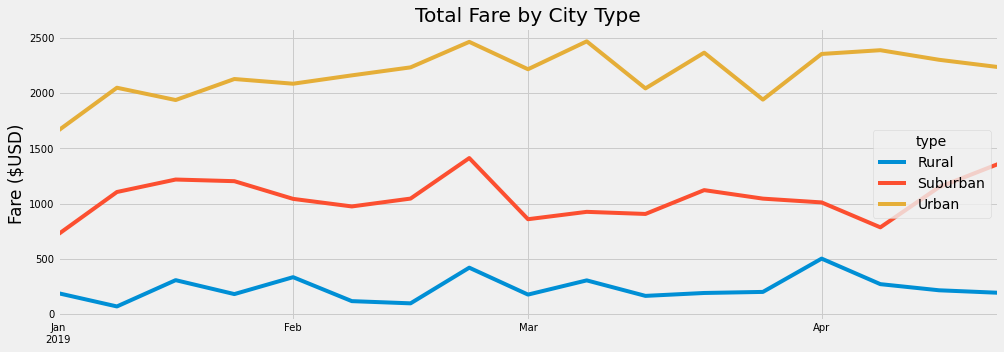

In [549]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

## Create plot. 
ax = df_month.plot(title='Total Fare by City Type', fontsize=10, figsize=(15, 5))

## Add label to y-axis. 
ax.set_ylabel('Fare ($USD)')

## Remove label on x-axis. 
ax.set_xlabel('')

## Save graph. 
plt.savefig("Analysis/PyBer_fare_summary.png")